In [3]:
!git clone https://github.com/huggingface/diffusers

Cloning into 'diffusers'...
remote: Enumerating objects: 71242, done.
remote: Counting objects: 100% (1016/1016), done.
remote: Compressing objects: 100% (551/551), done.
remote: Total 71242 (delta 651), reused 642 (delta 382), pack-reused 70226 (from 1)
Receiving objects: 100% (71242/71242), 50.40 MiB | 17.57 MiB/s, done.
Resolving deltas: 100% (52546/52546), done.
Updating files: 100% (1579/1579), done.


In [1]:
!pip install huggingface_hub accelerate tokenizers protobuf transformers sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.4/436.4 kB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 148.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.6/316.6 kB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 153.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 130.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.7/782.7 kB 115.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install ./diffusers

Processing ./diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.31.0.dev0-py3-none-any.whl size=2799557 sha256=6838be53f6c510b6059227d426566906dd0bdd2cb5303f5a25b2c7899ee91e7f
  Stored in directory: /tmp/pip-ephem-wheel-cache-bjspwkn5/wheels/0f/20/c8/51c98dd92d3452e41884e999b329516f339b1c440542fc729e
Successfully built diffusers

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip


In [1]:
# %env CUDA_LAUNCH_BLOCKING=1
import torch
from pipeline_cogvideox import CogVideoXPipeline
from transformer_cogvideox_v2 import CogVideoXTransformer3DModel
from sampler_cogvideox import CogVideoXDDIMScheduler

prompt = "A detailed wooden toy ship with intricately carved masts and sails is seen gliding smoothly over a plush, blue carpet that mimics the waves of the sea. The ship's hull is painted a rich brown, with tiny windows. The carpet, soft and textured, provides a perfect backdrop, resembling an oceanic expanse. Surrounding the ship are various other toys and children's items, hinting at a playful environment. The scene captures the innocence and imagination of childhood, with the toy ship's journey symbolizing endless adventures in a whimsical, indoor setting."

transformer = CogVideoXTransformer3DModel.from_pretrained(
    "THUDM/CogVideoX-2b",
    torch_dtype=torch.float16,
    subfolder="transformer"
)
scheduler = CogVideoXDDIMScheduler.from_pretrained(
    "THUDM/CogVideoX-2b",
    torch_dtype=torch.float16,
    subfolder="scheduler"
)
pipe = CogVideoXPipeline.from_pretrained(
    "THUDM/CogVideoX-2b",
    torch_dtype=torch.float16,
    transformer=transformer,
    scheduler=scheduler
)

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
pipe.to("cuda")

CogVideoXPipeline {
  "_class_name": "CogVideoXPipeline",
  "_diffusers_version": "0.31.0.dev0",
  "_name_or_path": "THUDM/CogVideoX-2b",
  "scheduler": [
    "sampler_cogvideox",
    "CogVideoXDDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "T5EncoderModel"
  ],
  "tokenizer": [
    "transformers",
    "T5Tokenizer"
  ],
  "transformer": [
    "transformer_cogvideox_v2",
    "CogVideoXTransformer3DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKLCogVideoX"
  ]
}

In [4]:
video = pipe.generate_video(
    prompt=prompt,
    num_videos_per_prompt=1,
    num_inference_steps=96,
    num_frames=48,
    guidance_scale=6,
    height=480,
    width=720,
    generator=torch.Generator(device="cuda").manual_seed(42),
    latents_dir='./latents',
    save_latents=True
).frames[0]

(1, 12, 16, 60, 90)


  0%|          | 0/96 [00:00<?, ?it/s]

latents torch.Size([2, 12, 16, 60, 90])
torch.Size([24])
ada torch.Size([24, 512]) torch.Size([2, 16200, 1920])
noise_pred torch.Size([1, 12, 16, 60, 90]) latents torch.Size([1, 12, 16, 60, 90])
prev_timestep tensor([989, 989, 989, 989, 989, 989, 989, 989, 989, 989, 989, 989],
       device='cuda:0')
sample torch.Size([1, 12, 16, 60, 90]) timestep torch.Size([12])
broadcast_shape (1, 12, 1, 1, 1)
sample torch.Size([1, 12, 16, 60, 90]) a_t torch.Size([1, 12, 1, 1, 1]) b_t torch.Size([1, 12, 1, 1, 1])
t tensor([999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999],
       device='cuda:0') a_t tensor([[[[[1.0000]]],


         [[[1.0000]]],


         [[[1.0000]]],


         [[[1.0000]]],


         [[[1.0000]]],


         [[[1.0000]]],


         [[[1.0000]]],


         [[[1.0000]]],


         [[[1.0000]]],


         [[[1.0000]]],


         [[[1.0000]]],


         [[[1.0000]]]]], device='cuda:0', dtype=torch.float64)
latents torch.Size([2, 12, 16, 60, 90])
torch.Size([24])
a

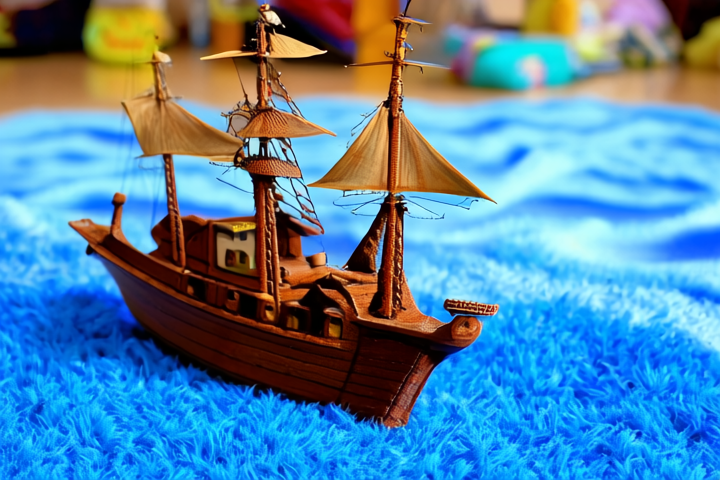

In [4]:
video[0]

In [ ]:
60 * 90 / 4

In [ ]:
torch.index_select(pipe.scheduler.alphas_cumprod, 0, torch.tensor([0, 700]))

In [ ]:
from PIL import Image
from IPython.display import display, Image as IPyImage

# Assuming `image_list` is your list of PIL images
# Example: creating some dummy images for the demonstration

# Save images as a GIF to a file
gif_path = 'my_animation.gif'
video[0].save(gif_path, save_all=True, append_images=video[1:], loop=0, duration=500)

# Display the GIF in Jupyter notebook
display(IPyImage(filename=gif_path))

48

FIFO config:
    num_partitions = 2
    partition_Size = 16 #num of video frames to denoise in one go
    f = partition_size // vae_temporal_scale_factor
    total_num_frames = 1000 #num of total video frames
    enable_lookahead_denoising = True
Steps:
    1. prepare latents. latent frames count = num_partitions * partition_size * 2(if look_ahead else 1)
    2. latents shape = [2, 256 * f, 1920]
       encoder_hidden_states = [2, 226, 512]
       timesteps = [2, 512] -> [2*f, 512]
       

21600

In [ ]:
FIFO Steps:
    1. Prepare the initial noise
    2. Prepare the latents, prompt embeds etc
    3. Prepare the num of times fifo needs to run to get the total num frames
    4. For each iteration, get the output frame, updated latents and write them to file. Consider the vae scale factor
    

In [6]:
from sampler_cogvideox import CogVideoXDDIMScheduler
scheduler = CogVideoXDDIMScheduler.from_pretrained(
    "THUDM/CogVideoX-2b",
    torch_dtype=torch.bfloat16,
    subfolder="scheduler"
)

scheduler/scheduler_config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [7]:
import inspect

In [8]:
inspect.signature(scheduler.step)

<Signature (model_output: torch.Tensor, timestep: int, sample: torch.Tensor, eta: float = 0.0, use_clipped_model_output: bool = False, generator=None, variance_noise: Optional[torch.Tensor] = None, return_dict: bool = True) -> Union[sampler_cogvideox.DDIMSchedulerOutput, Tuple]>

In [1]:
!pip install argparse


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
### IMPORTS

import torch
import argparse
from pipeline_cogvideox import CogVideoXPipeline
from transformer_cogvideox_v2 import CogVideoXTransformer3DModel
from sampler_cogvideox import CogVideoXDDIMScheduler

from tqdm import trange, tqdm
from torchvision.utils import save_image


checkpoint = "THUDM/CogVideoX-2b"
dtype = torch.bfloat16
device = "cuda"

### INIT
transformer = CogVideoXTransformer3DModel.from_pretrained(
    checkpoint,
    torch_dtype=dtype,
    subfolder="transformer"
)
scheduler = CogVideoXDDIMScheduler.from_pretrained(
    checkpoint,
    torch_dtype=dtype,
    subfolder="scheduler"
)
pipe = CogVideoXPipeline.from_pretrained(
    checkpoint,
    torch_dtype=dtype,
    transformer=transformer,
    scheduler=scheduler
)

print("model loading")
### FIFO Pipeline

def shift_latents(latents, scheduler):
    # shift latents
    latents[:,:,:-1] = latents[:,:,1:].clone()

    # add new noise to the last frame
    latents[:,:,-1] = torch.randn_like(latents[:,:,-1]) * scheduler.init_noise_sigma

    return latents



def main(args):
    # args.video_length a.k.a f = 16 or 48 need to check if to use video frames or video latents
    # args.height
    # args.width
    # args.new_video_length #total num of frames in final video
    # args.video_length #num of frames per iteration to be processed/denoised a.k.a partition size
    # args.num_partitions
    # args.queue_length = args.video_length * args.num_partitions
    # args.num_sampling_steps = args.video_length * args.num_partitions
    # args.lookahead_denoising
    # args.max_queue_length = num of latents to keep in memory before
    generator = torch.Generator('cuda').manual_seed(0)
    fifo_video_frames = []
    fifo_first_latents = []

    new_video_length = (args.new_video_length - 1) // self.vae_scale_factor_temporal + 1
    video_length = (args.video_length - 1) // self.vae_scale_factor_temporal + 1
    
    timesteps = pipe.scheduler.timesteps
    timesteps = torch.flip(timesteps, [0])
    if args.lookahead_denoising:
        timesteps = torch.cat([torch.full((video_length//2,), timesteps[0]).to(timesteps.device), timesteps])

    ## check this again
    max_queue_length = len(timesteps)
    bsz = 1
    ch = pipe.transformer.config.in_channels
    h = args.height // pipe.vae.vae_scale_factor[1]
    w = args.width // pipe.vae.vae_scale_factor[2]
    init_noise_shape = [bsz, ch, max_queue_length, h, w]
    ## check this again - END

    latents = self.prepare_latents(
            batch_size * num_videos_per_prompt,
            pipe.transformer.config.in_channels,
            # num_frames,
            max_queue_length,
            args.height,
            args.width,
            dtype,
            device,
            generator,
            None,
        )

    latents = randn_tensor(init_noise_shape, device=pipe.text_encoder.device, dtype=torch.float16)
    
    num_vae = (new_video_length - 1) // (video_length-1)
    if (new_video_length - 1) % (video_length-1) != 0:
        num_vae += 1
    
    num_iterations = num_vae * (video_length-1) + 1 + args.queue_length

    for i in trange(num_iterations):
        num_inference_steps_per_gpu = video_length
        curr_timesteps = timesteps.clone()

        if i < max_queue_length-1:
            curr_timesteps[:-i-1] = curr_timesteps[-i-1]

        for rank in reversed(range(2 * args.num_partitions if args.lookahead_denoising else args.num_partitions)):
            if args.lookahead_denoising:
                start_idx = (rank // 2) * num_inference_steps_per_gpu + (rank % 2) * (num_inference_steps_per_gpu // 2)
            else:
                start_idx = rank * num_inference_steps_per_gpu
            midpoint_idx = start_idx + num_inference_steps_per_gpu // 2 + (rank % 2)
            end_idx = start_idx + num_inference_steps_per_gpu
            
            t = curr_timesteps[start_idx:end_idx]
            print("timesteps shape", t.shape)
            input_latents = latents[:,:,start_idx:end_idx].clone()

            output_latents, first_latent, first_frame = pipe.fifo_onestep(prompt,
                                    video_length=args.video_length,
                                    height=args.height,
                                    width=args.width,
                                    num_inference_steps=args.num_sampling_steps,
                                    guidance_scale=args.guidance_scale,
                                    enable_temporal_attentions=not args.force_images,
                                    num_images_per_prompt=1,
                                    mask_feature=True,
                                    latents=input_latents,
                                    timesteps=t,
                                    save_frames=args.save_frames,
                                    )

            if args.lookahead_denoising:
                latents[:,:,midpoint_idx:end_idx] = output_latents[:,:,-(end_idx-midpoint_idx):]
            else:
                latents[:,:,start_idx:end_idx] = output_latents
            del output_latents

        latents = shift_latents(latents, videogen_pipeline.scheduler)

        if i >= max_queue_length:
            if args.save_frames:
                output_path = os.path.join(fifo_dir, f"frame_{i:04d}.png")
                imageio.mimwrite(output_path, first_frame, quality=9)  # highest quality is 10, lowest is 0
            fifo_first_latents.append(first_latent)
        fifo_vae_video_frames = []
        
    for i in range(num_vae):
        target_latents = torch.cat(fifo_first_latents[i*(args.video_length-1):(i+1)*(args.video_length-1)+1], dim=2)
        video = videogen_pipeline.decode_latents(target_latents)[0]

        if i == 0:
            fifo_vae_video_frames.append(video)
        else:
            fifo_vae_video_frames.append(video[1:])
    
    if num_vae > 0:
        fifo_vae_video_frames = torch.cat(fifo_vae_video_frames, dim=0)
        if args.output_dir is None:
            output_vae_path = os.path.join(output_dir, "fifo_vae.mp4")
        else:
            output_vae_path = os.path.join(args.output_dir, f"{prompt_save}.mp4")
        imageio.mimwrite(output_vae_path, fifo_vae_video_frames, fps=args.fps, quality=9)

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--model_path", type=str, default='LanguageBind/Open-Sora-Plan-v1.1.0')
    parser.add_argument("--version", type=str, default=None, choices=[None, '65x512x512', '221x512x512', '513x512x512'])
    parser.add_argument("--num_frames", type=int, default=65)
    parser.add_argument("--height", type=int, default=480)
    parser.add_argument("--width", type=int, default=720)
    # parser.add_argument("--ae", type=str, default='CausalVAEModel_4x8x8')
    # parser.add_argument("--text_encoder_name", type=str, default='DeepFloyd/t5-v1_1-xxl')
    parser.add_argument("--guidance_scale", type=float, default=7.5)
    # parser.add_argument("--sample_method", type=str, default="DDPM")
    parser.add_argument("--num_sampling_steps", type=int, default=50)
    parser.add_argument("--queue_length", type=int, default=17)
    parser.add_argument("--fps", type=int, default=8)
    # parser.add_argument("--run_time", type=int, default=0)
    parser.add_argument("--text_prompt", nargs='+')
    # parser.add_argument('--force_images', action='store_true')
    # parser.add_argument('--tile_overlap_factor', type=float, default=0.25)
    # parser.add_argument('--enable_tiling', action='store_true')
    # parser.add_argument("--cache_dir", type=str, default="./cache")
    parser.add_argument("--video_length", "-f", type=int, default=17)
    parser.add_argument("--new_video_length", "-N", type=int, default=None)
    parser.add_argument("--num_partitions", "-n", type=int, default=4)
    parser.add_argument("--lookahead_denoising", "-ld", action='store_false', default=True)
    parser.add_argument("--output_dir", type=str, default=None, help="custom output directory")
    parser.add_argument("--save_frames", action='store_true', default=False)

    args = parser.parse_args()

    assert args.num_frames == 4*args.video_length - 3

    args.queue_length = args.video_length * args.num_partitions
    args.num_sampling_steps = args.video_length * args.num_partitions

    main(args)

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

model loading


usage: ipykernel_launcher.py [-h] [--model_path MODEL_PATH]
                             [--version {None,65x512x512,221x512x512,513x512x512}]
                             [--num_frames NUM_FRAMES] [--height HEIGHT]
                             [--width WIDTH] [--guidance_scale GUIDANCE_SCALE]
                             [--num_sampling_steps NUM_SAMPLING_STEPS]
                             [--queue_length QUEUE_LENGTH] [--fps FPS]
                             [--text_prompt TEXT_PROMPT [TEXT_PROMPT ...]]
                             [--video_length VIDEO_LENGTH]
                             [--new_video_length NEW_VIDEO_LENGTH]
                             [--num_partitions NUM_PARTITIONS]
                             [--lookahead_denoising] [--output_dir OUTPUT_DIR]
                             [--save_frames]
ipykernel_launcher.py: error: argument --video_length/-f: invalid int value: '/root/.local/share/jupyter/runtime/kernel-e6e7f97c-fa1a-4522-871e-877e32177a8e.json'


AttributeError: 'tuple' object has no attribute 'tb_frame'

In [1]:
import torch
from diffusers import CogVideoXPipeline
from diffusers.utils import export_to_video

prompt = "A panda, dressed in a small, red jacket and a tiny hat, sits on a wooden stool in a serene bamboo forest. The panda's fluffy paws strum a miniature acoustic guitar, producing soft, melodic tunes. Nearby, a few other pandas gather, watching curiously and some clapping in rhythm. Sunlight filters through the tall bamboo, casting a gentle glow on the scene. The panda's face is expressive, showing concentration and joy as it plays. The background includes a small, flowing stream and vibrant green foliage, enhancing the peaceful and magical atmosphere of this unique musical performance."

pipe = CogVideoXPipeline.from_pretrained(
    "THUDM/CogVideoX-2b",
    torch_dtype=torch.float16
)

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
pipe.to('cuda')

CogVideoXPipeline {
  "_class_name": "CogVideoXPipeline",
  "_diffusers_version": "0.31.0.dev0",
  "_name_or_path": "THUDM/CogVideoX-2b",
  "scheduler": [
    "diffusers",
    "CogVideoXDDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "T5EncoderModel"
  ],
  "tokenizer": [
    "transformers",
    "T5Tokenizer"
  ],
  "transformer": [
    "diffusers",
    "CogVideoXTransformer3DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKLCogVideoX"
  ]
}

In [6]:
video = pipe(
    prompt=prompt,
    num_videos_per_prompt=1,
    num_inference_steps=50,
    num_frames=5,
    guidance_scale=6,
    generator=torch.Generator(device="cuda").manual_seed(42),
    output_type='latent',
).frames[0]

  0%|          | 0/50 [00:00<?, ?it/s]

In [7]:
video.dtype

torch.float16

In [9]:
with torch.no_grad():
    out = pipe.decode_latents(video.unsqueeze(0))

torch.Size([1, 3, 8, 480, 720])

In [3]:
import torch

In [1]:
import torch
from diffusers import CogVideoXPipeline
from diffusers.utils import export_to_video

prompt = "A panda, dressed in a small, red jacket and a tiny hat, sits on a wooden stool in a serene bamboo forest. The panda's fluffy paws strum a miniature acoustic guitar, producing soft, melodic tunes. Nearby, a few other pandas gather, watching curiously and some clapping in rhythm. Sunlight filters through the tall bamboo, casting a gentle glow on the scene. The panda's face is expressive, showing concentration and joy as it plays. The background includes a small, flowing stream and vibrant green foliage, enhancing the peaceful and magical atmosphere of this unique musical performance."

pipe = CogVideoXPipeline.from_pretrained(
    "THUDM/CogVideoX-2b",
    torch_dtype=torch.float16
)

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
pipe.vae = pipe.vae.to('cuda')

In [4]:
tensor = torch.randn((1,1,16,60,90)).to('cuda').half()

In [4]:
tensor.permute(0,2,1,3,4).shape

torch.Size([1, 16, 1, 60, 90])

In [5]:
pipe.vae.enable_tiling()

In [14]:
out = pipe.decode_latents(video.unsqueeze(0))

torch.Size([1, 16, 2, 60, 90])
frame_batch_size 2
num_batches 1


OutOfMemoryError: CUDA out of memory. Tried to allocate 132.00 MiB. GPU 0 has a total capacty of 44.34 GiB of which 86.81 MiB is free. Process 660831 has 44.25 GiB memory in use. Of the allocated memory 43.35 GiB is allocated by PyTorch, and 587.99 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [13]:
video.unsqueeze(0).shape

torch.Size([1, 2, 16, 60, 90])

In [9]:
!nvidia-smi

Sun Sep 29 15:30:16 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A40                     On  |   00000000:57:00.0 Off |                    0 |
|  0%   39C    P0             76W /  300W |   32855MiB /  46068MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----